In [35]:
# Load EDA Pkgs
import pandas as pd
import numpy as np            

In [36]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [38]:
df = pd.read_csv("data.csv")

In [39]:
df.shape

(10017, 4)

In [40]:
df.head()

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


In [41]:
df.shape

(10017, 4)

In [42]:
df.dtypes

Sl no          int64
Tweets        object
Search key    object
Feeling       object
dtype: object

In [43]:
df.isnull().sum()

Sl no         0
Tweets        0
Search key    0
Feeling       0
dtype: int64

In [44]:
# Value Counts
df['Feeling'].value_counts()

happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: Feeling, dtype: int64

<AxesSubplot:xlabel='Feeling', ylabel='count'>

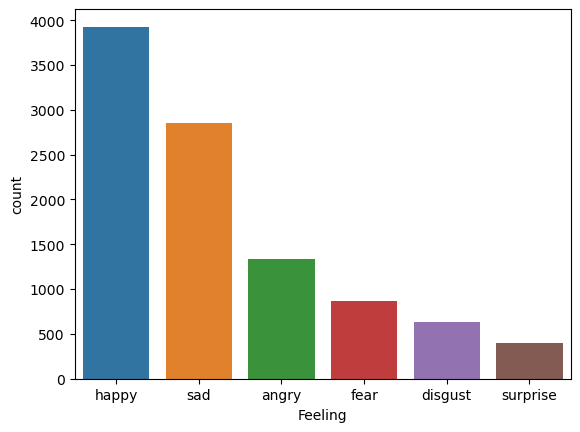

In [45]:
sns.countplot(x='Feeling',data=df)

In [46]:
#Sentiment Analysis
from textblob import TextBlob

In [47]:
def get_sentiment (text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result= "Neutral"
    return result
        
        

In [51]:
get_sentiment("I am feeling very stressed")

'Positive'

In [49]:
get_sentiment("I wanna sleep")

'Neutral'

In [33]:
get_sentiment("I hate apples")

'Negative'

In [34]:
get_sentiment("I'm craving sushi")

'Neutral'

In [57]:
get_sentiment('Theres only one of you, thats why your special')

'Positive'

In [58]:
df['Sentiment']=df['Tweets'].apply(get_sentiment)

In [59]:
df.head()

,Sl no,Tweets,Search key,Feeling,Sentiment
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy,Positive
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy,Neutral
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy,Positive
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy,Positive
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy,Positive


In [61]:
df.groupby(['Feeling','Sentiment']).size()

Feeling   Sentiment
angry     Negative      545
          Neutral       382
          Positive      414
disgust   Negative      138
          Neutral       223
          Positive      276
fear      Negative      204
          Neutral       388
          Positive      271
happy     Negative      406
          Neutral      1146
          Positive     2376
sad       Negative     1064
          Neutral       879
          Positive      906
surprise  Negative       60
          Neutral       215
          Positive      124
dtype: int64

<AxesSubplot:xlabel='Feeling,Sentiment'>

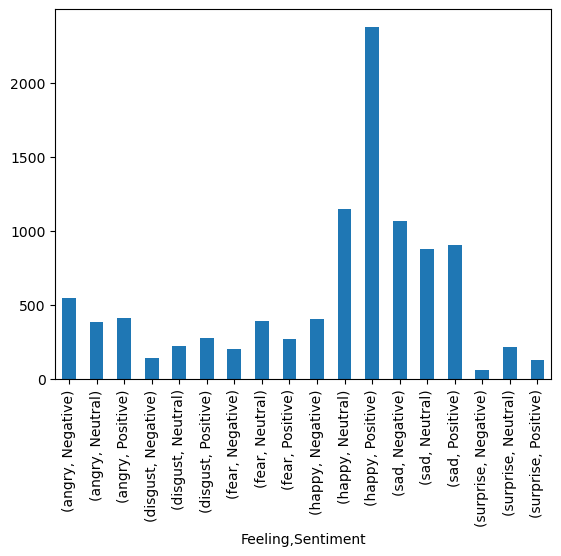

In [65]:
df.groupby(['Feeling','Sentiment']).size().plot(kind)

/Users/jocelyneli/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
/Users/jocelyneli/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


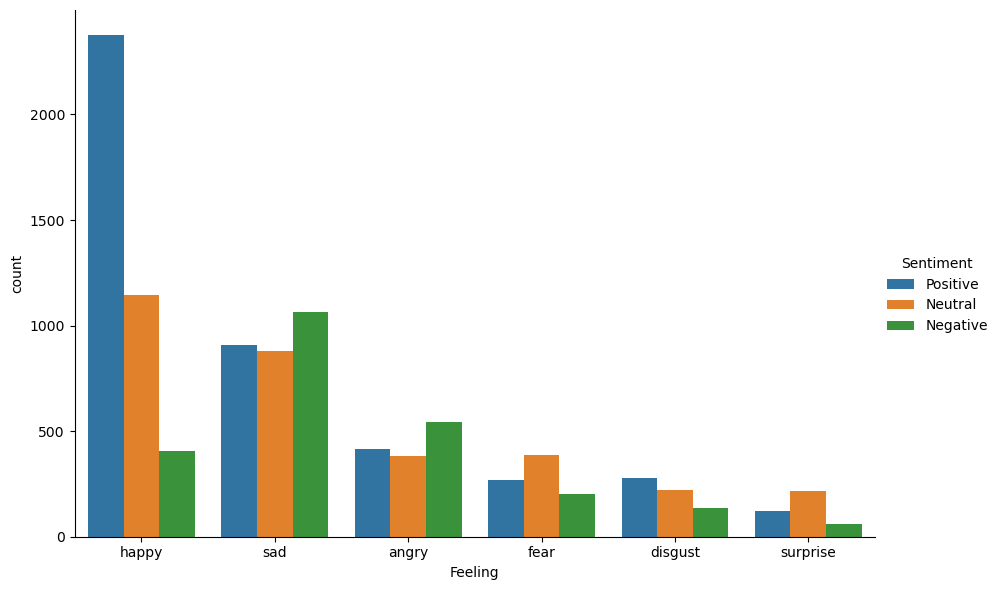

In [68]:
sns.factorplot (x='Feeling', hue='Sentiment', data=df, kind='count', size=6, aspect=1.5)

In [88]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [221]:
df['Clean_Tweets'] = df['Tweets'].apply(nfx.remove_stopwords)

In [222]:
df['Clean_Tweets'] = df['Tweets'].apply(nfx.remove_punctuations)

In [223]:
df['Clean_Tweets'] = df['Tweets'].apply(nfx.remove_userhandles)

In [224]:
df['Clean_Tweets'] = df['Tweets'].apply(nfx.remove_urls)

In [230]:
df['Clean_Tweets'] = df['Tweets'].apply(nfx.remove_hashtags)

In [231]:
df['Clean_Tweets'] = df['Tweets'].apply(nfx.remove_shortwords)

In [232]:
df['Clean_Tweets'] = df['Tweets'].apply(nfx.remove_html_tags)

In [233]:
df['Clean_Tweets'] = df['Tweets'].apply(nfx.remove_numbers)

In [234]:
df[['Tweets', 'Clean_Tweets']]

,Tweets,Clean_Tweets
0,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...","#: @fe ed ""RT @MirayaDizon: Time is ticking f..."
1,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...","#: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで、..."
2,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...","#: @Ris ♡ ed ""Happy birthday to one smokin ho..."
3,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...","#: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer up..."
4,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...","#: @Madhurima wth u vc♥ ed ""Good morning dear..."
...,...,...
10012,"Tweet #85: @Matteo tweeted ""@GameSpot @Frannkc...","Tweet #: @Matteo tweeted ""@GameSpot @Frannkche..."
10013,"Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted ""@BRATgiirl_ that’...","Tweet #: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted ""@BRATgiirl_ that’s ..."
10014,"Tweet #87: @Chowkidar Ricky Sharma tweeted ""@M...","Tweet #: @Chowkidar Ricky Sharma tweeted ""@Mam..."
10015,"Tweet #88: @Katoe.EXE tweeted ""u know what i h...","Tweet #: @Katoe.EXE tweeted ""u know what i hat..."


In [235]:
#Keyword Extraction
from collections import Counter

In [236]:
def extract_keywords(text, num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [237]:
#list of emotions
feeling_list = df['Feeling'].unique().tolist()

In [238]:
feeling_list

['happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']

In [239]:
happy_list = df[df['Feeling'] == 'happy']['Clean_Tweets'].tolist()

In [240]:
happy_docx= ''.join(happy_list)

In [241]:
happy_docx

' #: @fe ed "RT @MirayaDizon: Time is ticking fast. Relive the past happy moments while we can. Be the joy to everyone\'s face. #MaineLovesMAC #ALDUBW…" #: @蓮花 &はすか ed "RT @ninjaryugo: ＃コナモンの日 だそうで、コナモンさんこと雑渡昆奈門さんのコスプレアクションを再喝＃忍たま ＃落乱https://t.co/WnWLfRML" #: @Ris ♡ ed "Happy birthday to one smokin hot mama 🥵! I love you so much lil. You’re an amazing friend and although we met just this year it feels like I’ve known you forever and I really wish I did. You have been there for me through all my difficult moments this year and I appreciate that," #: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer up jwinnie ed "Omg I left for  min and - msgs ajdjsjs I cant save em all but I\'m so happy 😆😆🥰 moments like these will be ones I treasure for a long time idk why but it makes me so happy 😭😭😭" #: @Madhurima wth u vc♥ ed "Good morning dear❤ @VikramChatterje Wishing you a day filled with sunshine,  happiness,  love n pleasant moments!Have lovely day ❤Keep shining Keep smiling always Stay happy 🙂🙂Take care

In [242]:
keyword_happy = extract_keywords(happy_docx)

In [243]:
keyword_happy

{'ed': 3928,
 '#:': 3927,
 '"RT': 2122,
 'the': 1989,
 'to': 1850,
 'a': 1560,
 'of': 1511,
 'and': 1479,
 'you': 1078,
 'is': 986,
 'in': 863,
 'I': 831,
 'for': 700,
 'with': 540,
 'that': 509,
 'your': 506,
 'are': 437,
 'be': 418,
 'on': 378,
 'it': 367,
 'this': 353,
 'my': 350,
 'have': 337,
 'our': 322,
 'as': 322,
 '&': 309,
 'but': 305,
 'not': 300,
 'so': 293,
 'all': 273,
 'was': 255,
 'will': 239,
 'from': 226,
 'me': 225,
 'at': 224,
 'we': 221,
 'happy': 217,
 'about': 215,
 'has': 192,
 '-': 188,
 'who': 184,
 'The': 176,
 'i': 173,
 'an': 170,
 'like': 170,
 'very': 151,
 'they': 147,
 'what': 146,
 'when': 145,
 'can': 144}

In [244]:
#PLot
def plot_most_common_words (mydict):
    df_01 = pd.DataFrame (mydict.items(), columns= ['token', 'count'])
    plt.figure(figsize=(40,35))
    sns.barplot(x='token', y='count', data=df_01)
    plt.xticks(rotations=90)
    plt.show()

AttributeError: 'Text' object has no property 'rotations'

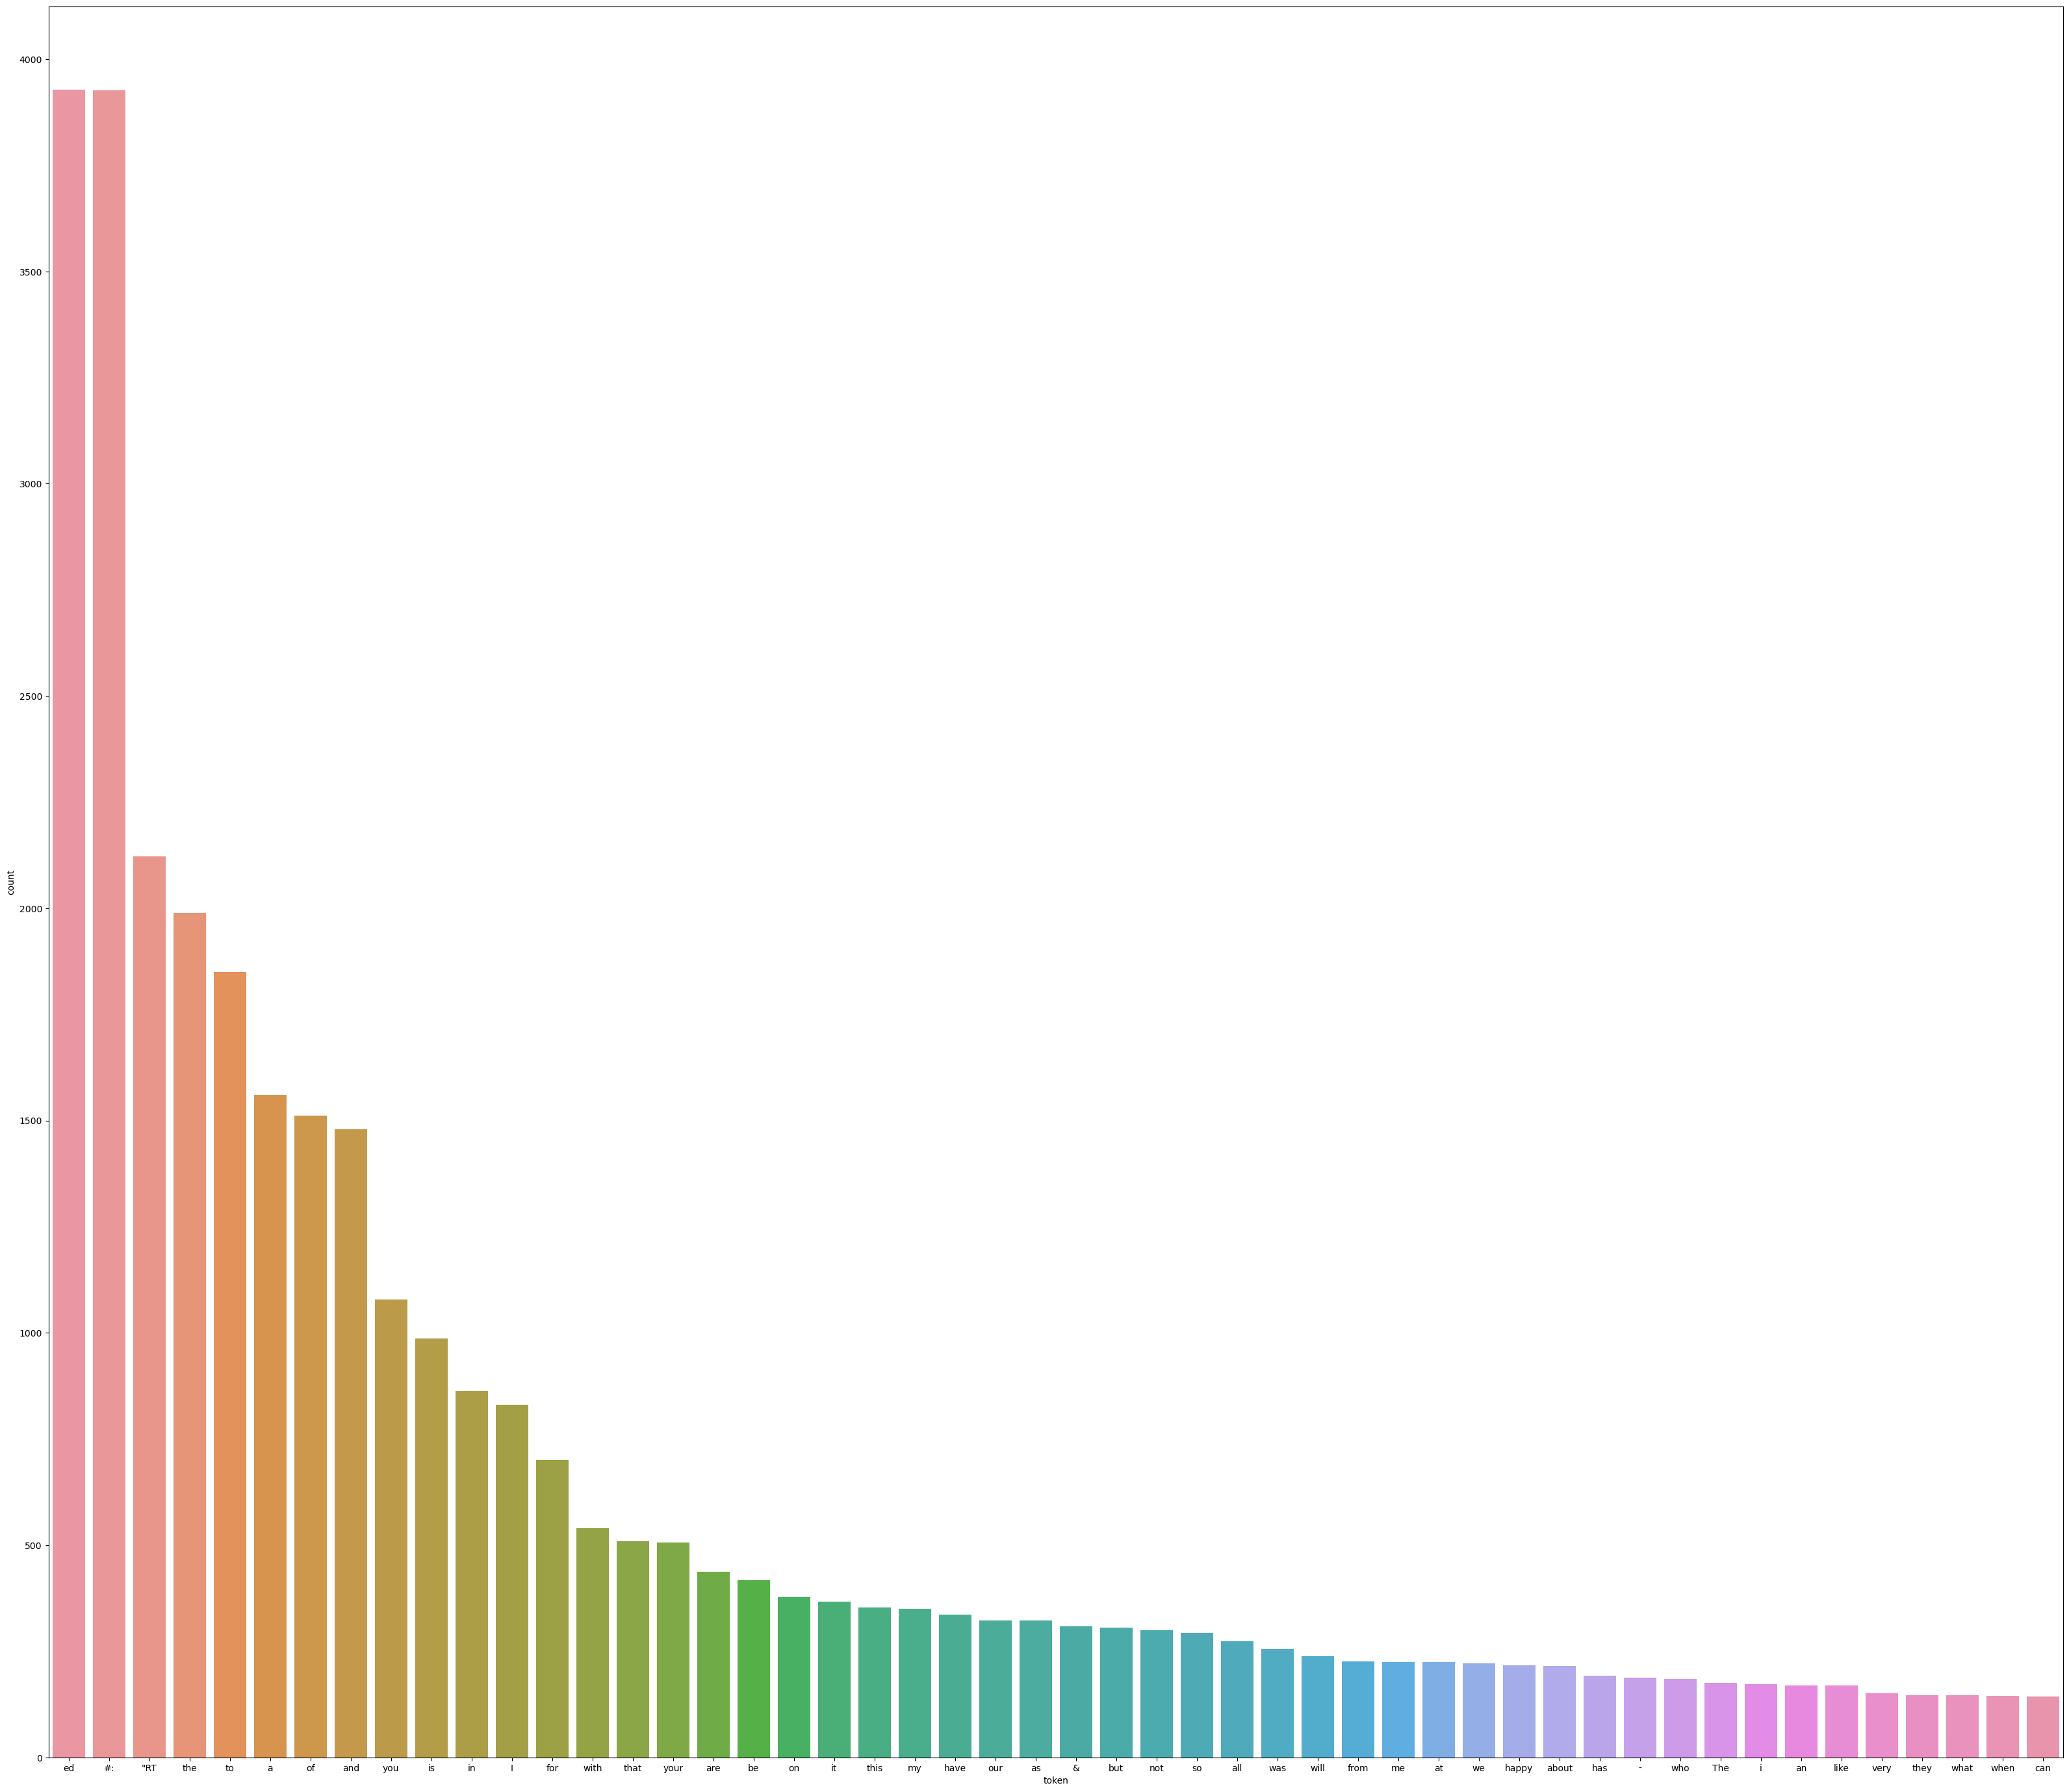

In [245]:
plot_most_common_words(keyword_happy)

In [ ]:
sad_list = df[df['Feeling'] == 'sad']['Clean_Tweets'].tolist()
sad_docx= ''.join(sad_list)
keyword_sad = extract_keywords(sad_docx)

AttributeError: 'Text' object has no property 'rotations'

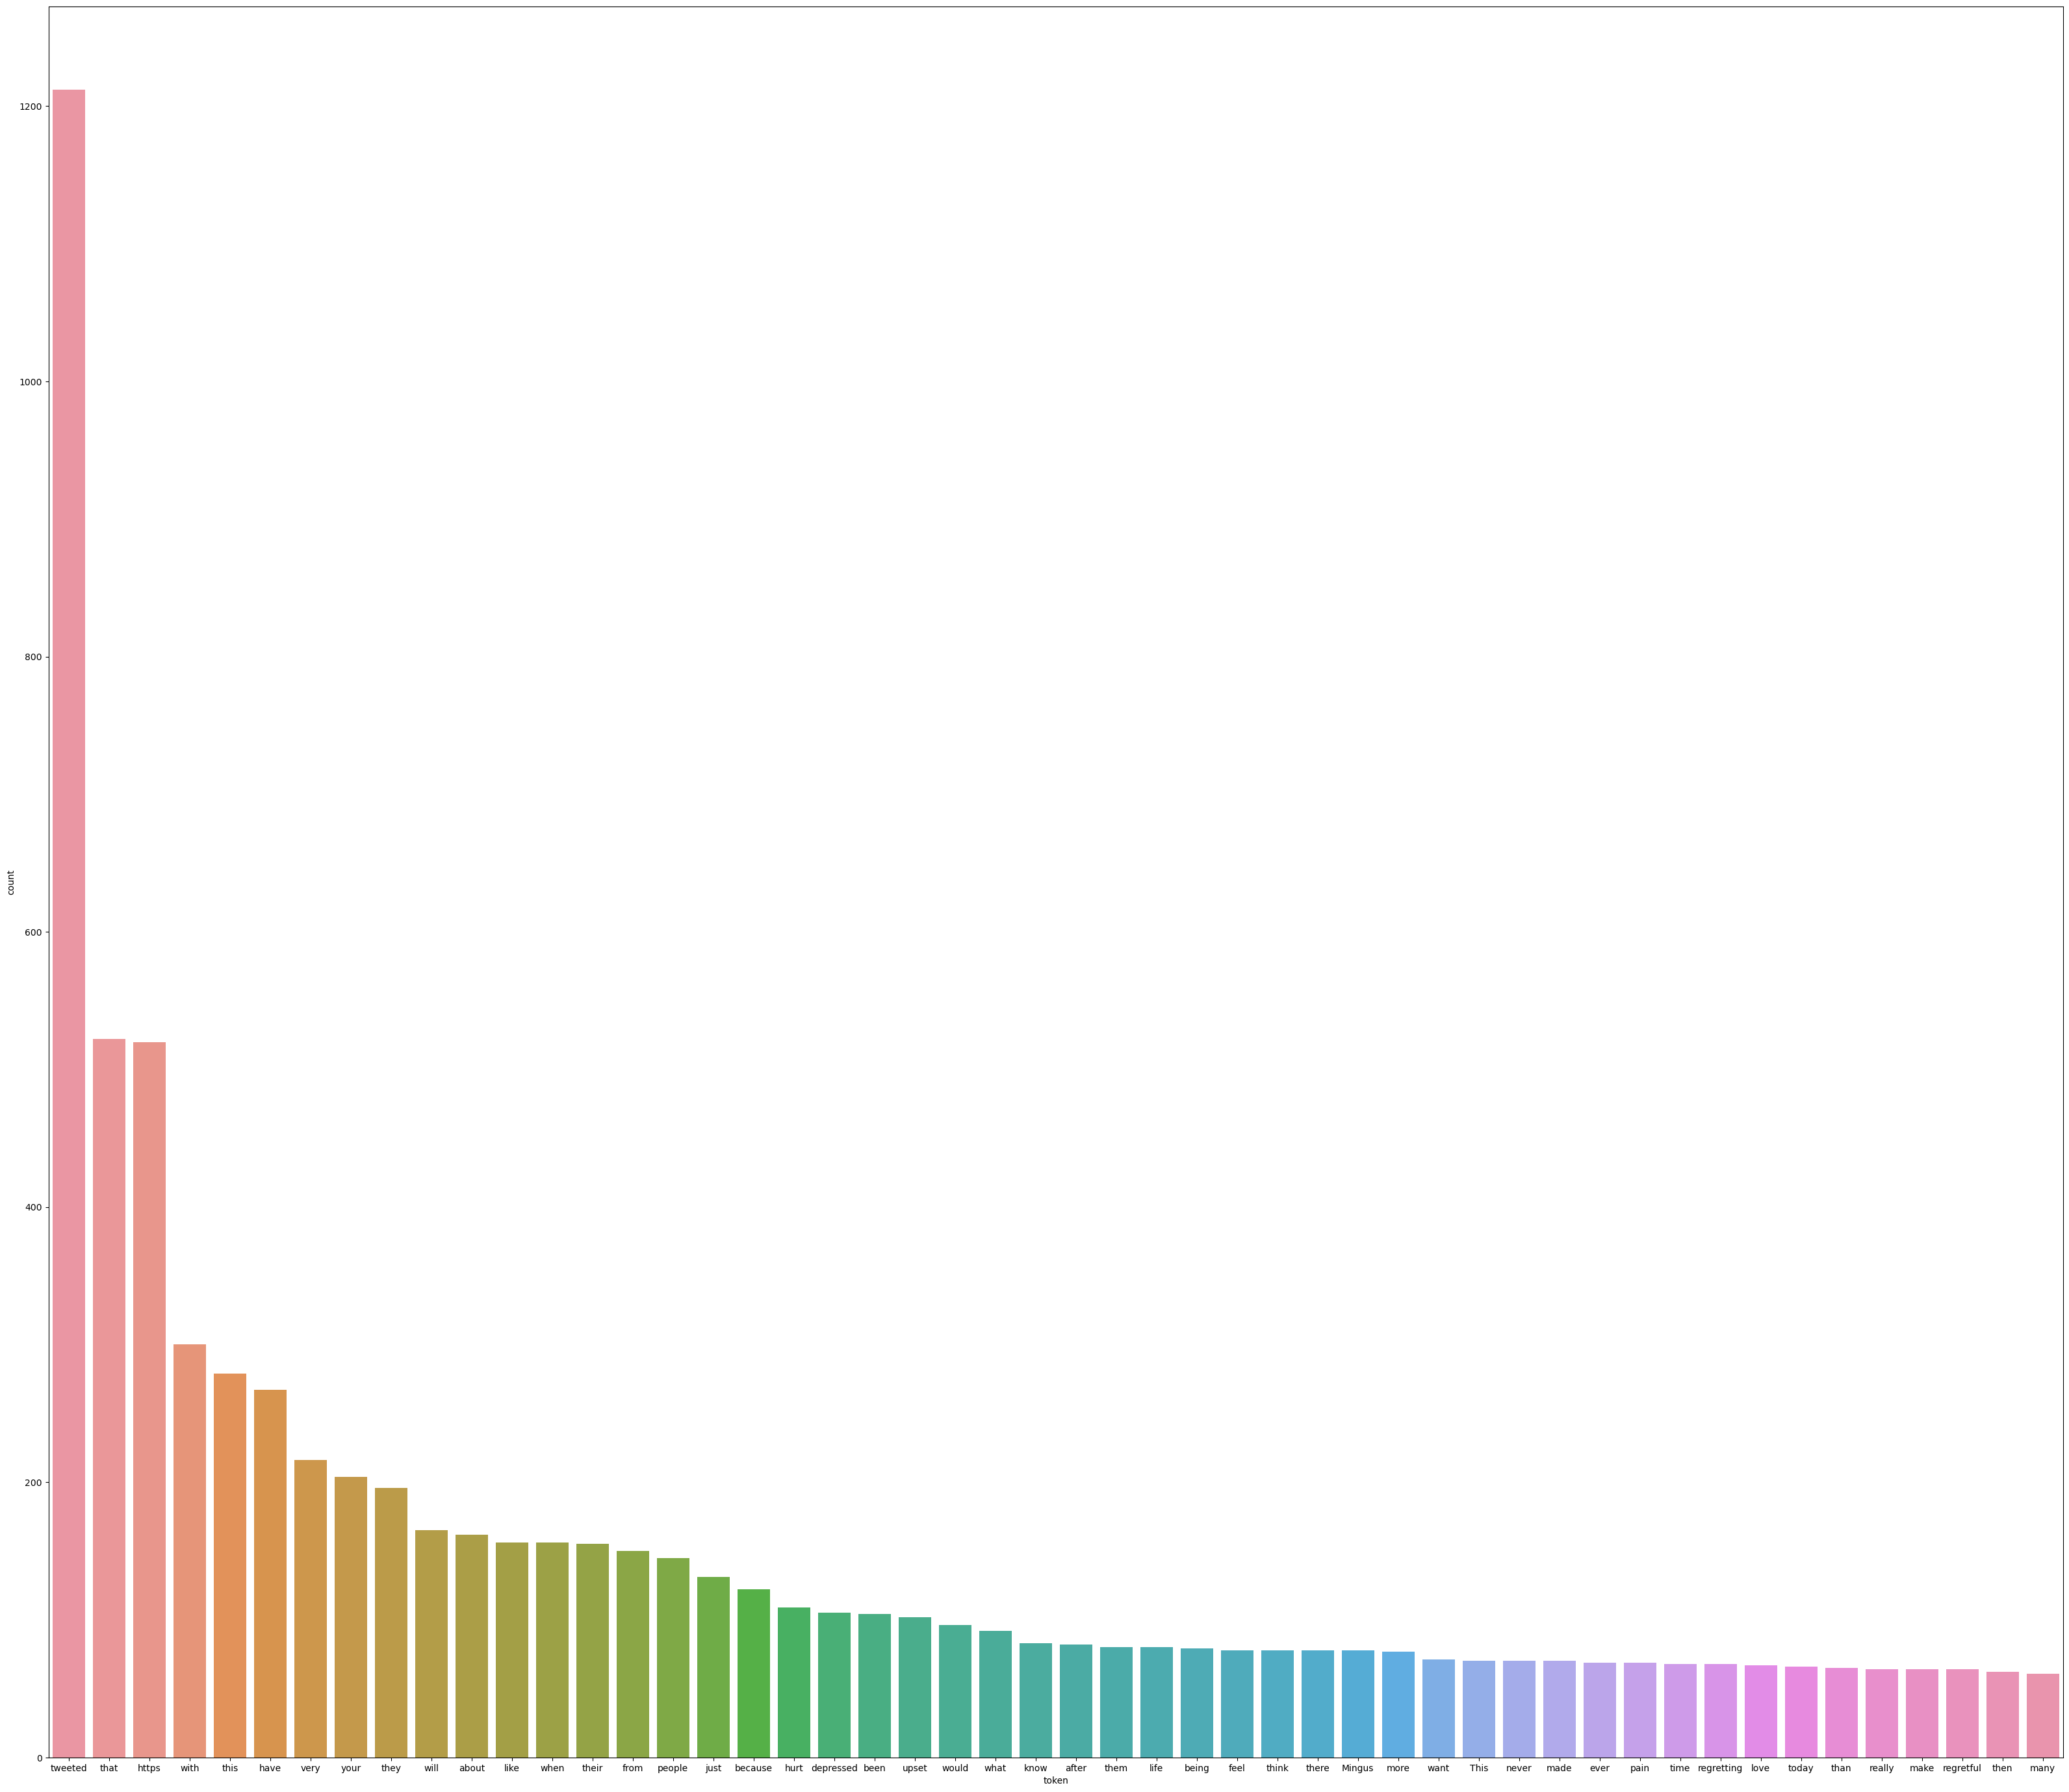

In [246]:
plot_most_common_words(keyword_sad)

In [247]:
###Word Cloud
from wordcloud import WordCloud

In [248]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

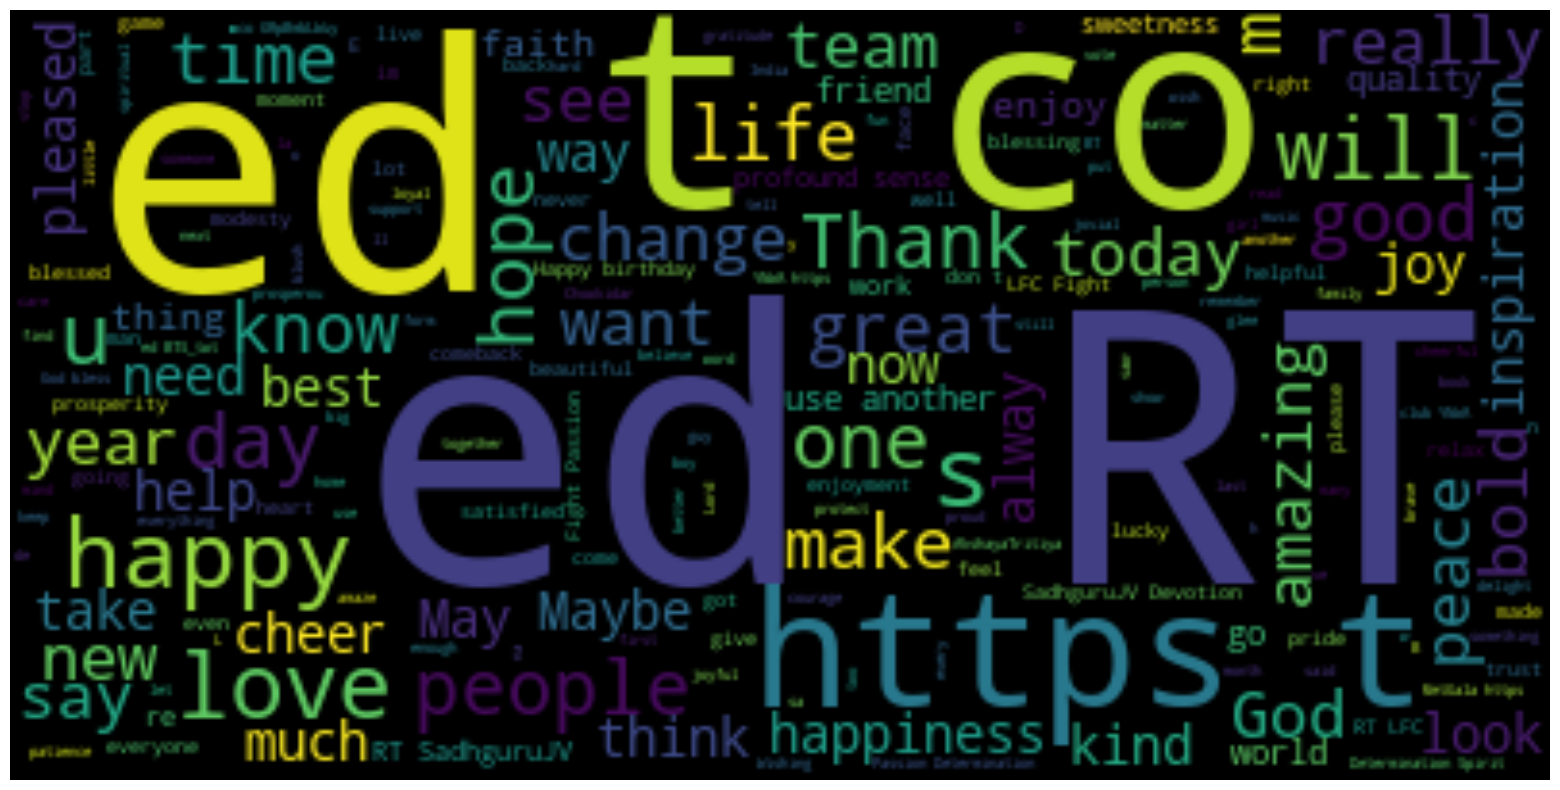

In [249]:
plot_wordcloud(happy_docx)

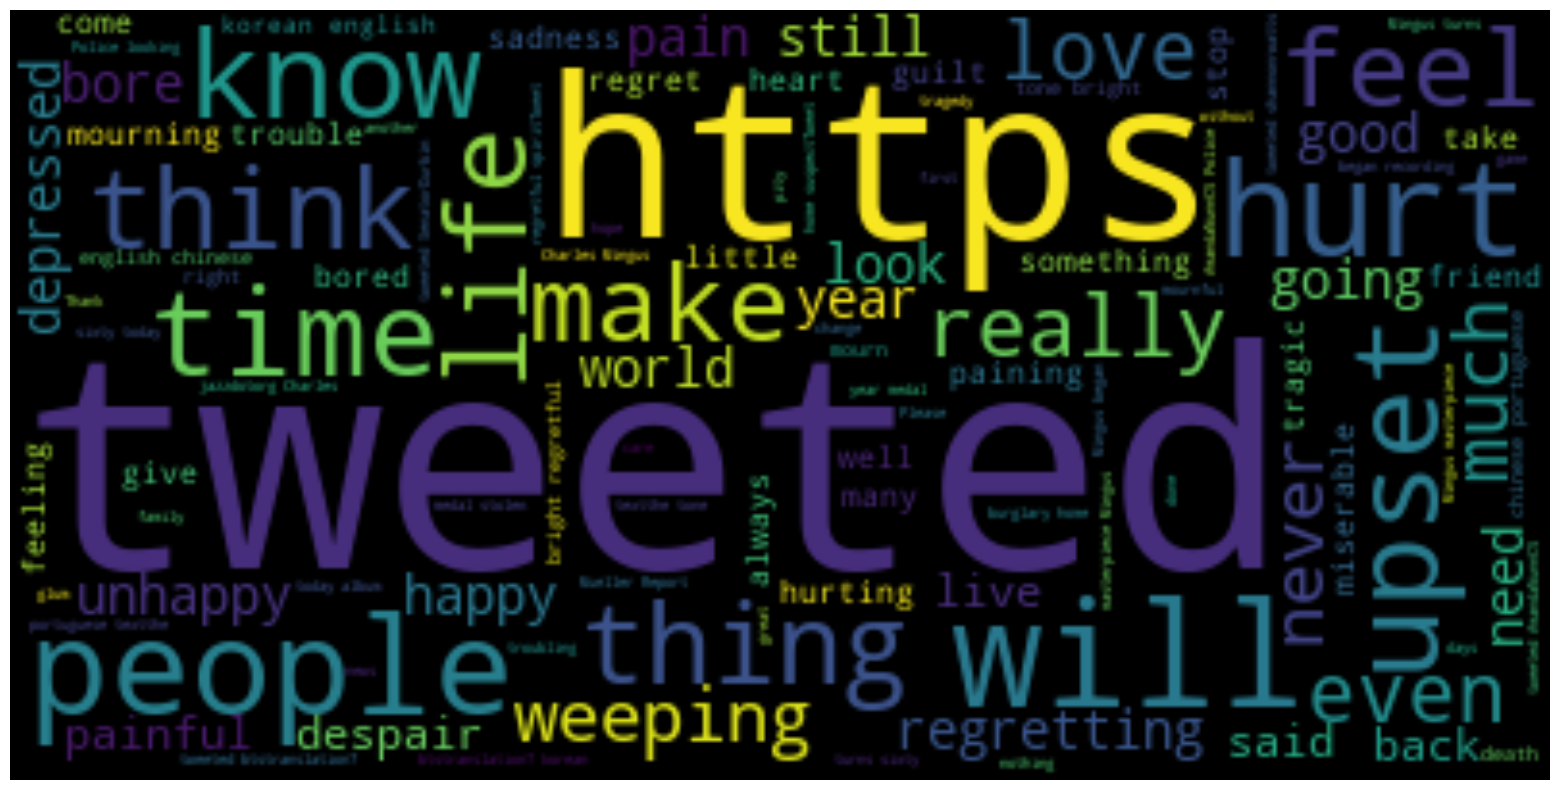

In [250]:
plot_wordcloud(sad_docx)

In [251]:
#Machine Learning

In [252]:
#Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [253]:
#Split Our Dataset
from sklearn.model_selection import train_test_split

In [254]:
###Build Features from text

In [255]:
Xfeatures = df['Clean_Tweets']
ylabels = df['Feeling']

In [256]:
Xfeatures

0         #: @fe ed "RT @MirayaDizon: Time is ticking f...
1         #: @蓮花 &はすか ed "RT @ninjaryugo: ＃コナモンの日 だそうで、...
2         #: @Ris ♡ ed "Happy birthday to one smokin ho...
3         #: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer up...
4         #: @Madhurima wth u vc♥ ed "Good morning dear...
                               ...                        
10012    Tweet #: @Matteo tweeted "@GameSpot @Frannkche...
10013    Tweet #: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted "@BRATgiirl_ that’s ...
10014    Tweet #: @Chowkidar Ricky Sharma tweeted "@Mam...
10015    Tweet #: @Katoe.EXE tweeted "u know what i hat...
10016    Tweet #: @Katoe.EXE tweeted "u know what i hat...
Name: Clean_Tweets, Length: 10017, dtype: object

In [258]:
#Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [260]:
cv.get_feature_names_out()

array(['__', '____', '_____', ..., '𝚓𝚘𝚗𝚎𝚜', '𝚓𝚞𝚜𝚝', '𝚕𝚊𝚞𝚛𝚎𝚗'],
      dtype=object)

In [261]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [264]:
#Split Dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [265]:
#Build Model

In [266]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [275]:
# Accuracy
# method 1

nv_model.score(X_test,y_test)

0.7508316699933466

In [276]:
# Predictions
y_pred_for_nv = nv_model.predict (X_test)

In [277]:
y_pred_for_nv

array(['sad', 'happy', 'happy', ..., 'happy', 'fear', 'happy'],
      dtype='<U8')

In [293]:
#Make a single prediction

sample_text = ["I like maths"]

In [310]:
vect=cv.transform(sample_text).toarray()

In [311]:
nv_model.predict(vect)

array(['happy'], dtype='<U8')

In [312]:
nv_model.predict_proba(vect)

array([[0.11957281, 0.04636734, 0.07440638, 0.50790182, 0.24029654,
        0.0114551 ]])

In [313]:
nv_model.classes_

array(['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise'],
      dtype='<U8')

In [314]:
np.max(nv_model.predict_proba(vect))

0.5079018235143564

In [318]:
def predict_feeling(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print(prediction[0])
    return pred_percentage_for_all
    

In [335]:
predict_feeling(sample_text,nv_model)

happy


{'angry': 0.11957281336288472,
 'disgust': 0.04636734036118199,
 'fear': 0.0744063829381081,
 'happy': 0.5079018235143564,
 'sad': 0.24029653839626824,
 'surprise': 0.011455101427199181}

In [336]:
predict_feeling(["He hates going outside"], nv_model)

sad


{'angry': 0.1600680364545415,
 'disgust': 0.006742462717816982,
 'fear': 0.007040743276537328,
 'happy': 0.34275788103508686,
 'sad': 0.4803970980662138,
 'surprise': 0.0029937784498068817}

In [337]:
#Model Evaluation
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       angry       0.86      0.52      0.65       371
     disgust       0.80      0.47      0.60       198
        fear       0.63      0.38      0.48       258
       happy       0.75      0.91      0.82      1211
         sad       0.75      0.84      0.79       846
    surprise       0.75      0.50      0.60       122

    accuracy                           0.75      3006
   macro avg       0.76      0.60      0.66      3006
weighted avg       0.75      0.75      0.74      3006



In [338]:
#confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[ 192,    1,    4,   84,   88,    2],
       [   4,   94,    2,   62,   36,    0],
       [   8,    1,   99,  101,   47,    2],
       [   8,    9,   28, 1097,   60,    9],
       [  10,   11,   23,   81,  714,    7],
       [   2,    1,    0,   45,   13,   61]])

/Users/jocelyneli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


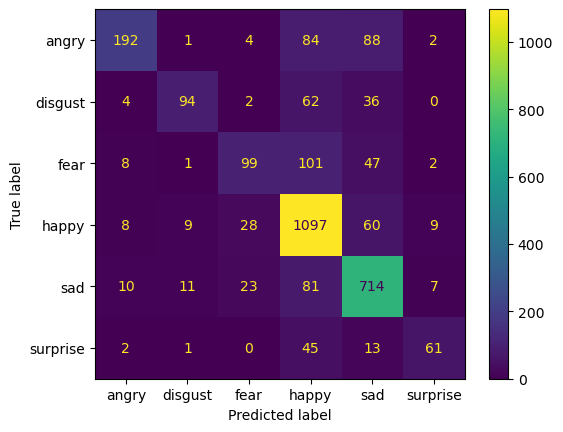

In [339]:
#Plot confusion matrix
plot_confusion_matrix(nv_model,X_test,y_test)

In [340]:
###Save Model

In [349]:
# import joblib

In [361]:
# model_file = open("feeling_classifier_nv_model_5_fb_2023.pkl","wb")
# joblib.dump(nv_model,model_file)
# model_file.close()

In [362]:
#Model Interprate

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/Users/jocelyneli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [363]:
lr_model.score(X_test,y_test)

0.9021956087824351

In [364]:
predict_feeling(sample_text,lr_model)

sad


{'angry': 0.15195130866062176,
 'disgust': 0.01734609673519596,
 'fear': 0.02913452947467617,
 'happy': 0.18216350337876766,
 'sad': 0.5771865537727787,
 'surprise': 0.04221800797795964}

In [365]:
import eli5

In [366]:
#show Weight for each class
eli5.show_weights(lr_model,top=20)

In [367]:
class_names = ylabels.unique().tolist()

In [369]:
feature_names_out = cv.get_feature_names()

In [372]:
eli5.show_weights(lr_model, feature_names=feature_names,target_names=class_names)

In [371]:
?eli5.show_weights

In [374]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [375]:
import pickle
pickle.dump(clf, open('feeling_classifier_nv_model_5_fb_2023.pkl', 'wb'))